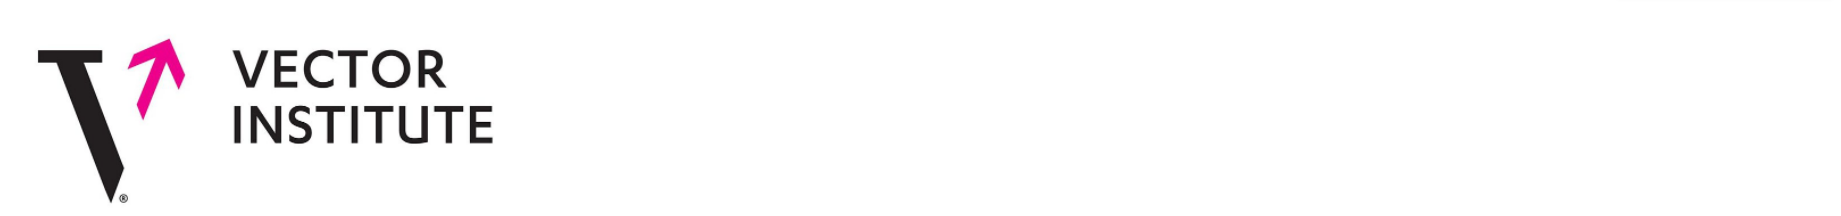

## Homework 2, part II. Decision Trees

We  will  use  a  dataset  of  1298  “fake  news”  headlines  (which  mostly  include 
headlines  of  articles  classified  as  biased,  etc.)  and  1968  “real”  news  headlines, 
where the “fake news” headlines are from https://www.kaggle.com/mrisdal/fake-news/data and “real news” headlines are from https://www.kaggle.com/therohk/million-headlines.  The  data  were  cleaned  by  removing  words  from  fake  news 
titles  that  are  not  a  part  of  the  headline,  removing  special  characters  from  the 
headlines,  and  restricting  real  news  headlines  to  those  after  October  2016 
containing the word “trump”. The cleaned-up data are available as clean_real.txt 
and clean_fake.txt in the google colab file. 

Each headline appears as a single line in the data file. You will build a decision 
tree to classify real vs. fake news headlines. Instead of coding the decision trees 
yourself,  you  will  do  what  we  normally  do  in  practice  —  use  an  existing 
implementation.  You  should  use  the  DecisionTreeClassifier  included  in  sklearn. 
Note that figuring out how to use this implementation is a part of the 
assignment.



In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

import numpy as np

from sklearn import tree
import graphviz

from matplotlib import pyplot as plt

In [2]:
#These two lines allow you to import the necessary data (you can open the links to see the content of those files if you are curious)
! wget https://raw.githubusercontent.com/carrasqu/datah2/master/data/clean_fake.txt 
! wget https://raw.githubusercontent.com/carrasqu/datah2/master/data/clean_real.txt

# This function performs a data split (training, validation, test sets)
def split_data(X, y, train_size=0.7, val_size=0.15):
    # Get the dimension of the first axis of X, which is the total number of data points
    total_data = X.shape[0] 
    # Creating same shape for all sizes:
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    # Randomize the indices of X and y before splitting into train, validation and test sets
    all_indices = np.random.permutation(np.arange(total_data)) 
    # Splitting up new indicies according to size from above (70% is training data, 15% is val and 15% is test)
    train_indices = all_indices[:train_size]
    val_indices = all_indices[train_size:train_size + val_size]
    test_indices = all_indices[train_size+val_size:]
    # Defining the two array sections (X being the words vectorized, y being the real or fake category)
    train_X, train_y = X[train_indices], y[train_indices]
    val_X, val_y = X[val_indices], y[val_indices]
    test_X, test_y = X[test_indices], y[test_indices]

    #The output of this function below is a python dictionary(https://realpython.com/python-dicts/); call on by: data['train']
    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }

# This function loads, processes (using CountVectorizer https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), and splits the data from the downloaded files 
def load_data(paths):
    # Convert a collection of text documents to a matrix of token counts.
    # 'content': the input is expected to be a sequence of items that can be of type string or byte.
    # .CountVectorizer has a bunch of functions to be used to work with the vectorized data
    vec = CountVectorizer(input='content')
    lines = []
    counts = []
    
    # This loop is used to read the files in each path (https://www.w3schools.com/python/python_file_open.asp)
    for p in paths: 
        with open(p) as f:
            file_lines = f.readlines()
        counts.append(len(file_lines))
        lines.extend([l.strip() for l in file_lines])

    #.fit() returns a vector corresponding to each vocabulary dictionary from all headlines (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit)
    vec.fit(lines)   
    # takes every line from the files makes them into a matrix then change to array (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform)
    data_matrix = vec.transform(lines).toarray() 
    
    ### Cleaner: put those two lines together by using .fit_transform(lines).toarray() (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#:~:text=Fitted%20vectorizer.-,fit_transform(raw_documents%2C%20y%3DNone),Document%2Dterm%20matrix.,-get_feature_names()):
    ### data_matrix = vec.fit_transform(lines).toarray()  
    
    # np.concatenate labels 0 are given for real data and labels 1 for fake data in a separate array.
    y = np.concatenate((np.zeros(counts[0]), np.ones(counts[1]))) 
    # split_data() takes the data_matrix we made above and puts it as X and the real/fake label as y
    # .get_feature_names_out() maps every single word that appears in all the headers and creates a vector (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#:~:text=get_feature_names_out(%5Binput_features%5D),names%20for%20transformation.)
    return split_data(data_matrix, y), vec.get_feature_names_out()

data, feature_names = load_data(['/content/clean_real.txt', '/content/clean_fake.txt'])

# !rm clean* # this is to delete the data from directory after we downloaded them


--2022-03-28 10:51:59--  https://raw.githubusercontent.com/carrasqu/datah2/master/data/clean_fake.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94400 (92K) [text/plain]
Saving to: ‘clean_fake.txt’

clean_fake.txt      100%[===================>]  92.19K  --.-KB/s    in 0.03s   

2022-03-28 10:51:59 (3.03 MB/s) - ‘clean_fake.txt’ saved [94400/94400]

--2022-03-28 10:51:59--  https://raw.githubusercontent.com/carrasqu/datah2/master/data/clean_real.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103149 (101K) [text/plain]
Sa

### Exploring the Code:

*Understanding what the .get_feature_names_out; puts every word within the titles into a vector*

In [3]:
paths = ['/content/clean_real.txt', '/content/clean_fake.txt']   

vec = CountVectorizer(input='content')
lines = []
counts = []
    
for p in paths: 
  with open(p) as f:
    file_lines = f.readlines()
  counts.append(len(file_lines))
  lines.extend([l.strip() for l in file_lines])

vec.fit(lines) 
data_matrix = vec.transform(lines).toarray() 

y = np.concatenate((np.zeros(counts[0]), np.ones(counts[1]))) 

# .get_feature_names_out() maps every single word that appears in all the headers and creates a vector
vec.get_feature_names_out()

array(['00', '000', '10', ..., 'zuesse', 'zulema', 'zur'], dtype=object)

*The dimensions correspond to the number of possible words*

In [4]:
vec.get_feature_names_out().shape

(5799,)

*For all the 'train', 'val' and 'test' datasets:*   
*X matrix ([0]): has rows to represent each individual title, and columns to represent every word*  
*y vector ([1]): has each entry corresponding to a row in the X matrix - 0 represents real and 1 represents fake news*

In [5]:
data['train'][1].shape

(2286,)

*The training data has 2286 points (titles)*

In [6]:
data['train'][0].shape

(2286, 5799)

*The validation data has 489 points (titles)*   

In [7]:
data['val'][0].shape

(489, 5799)

*The test data has 491 points (titles)*   

In [8]:
data['test'][0].shape

(491, 5799)

## 2.A

**Extract the dimensionality of the feature vectors:**  
   
    feature_names.shape = (5799,)
Dimensionality: <u>5799</u> strings contained in the titles

**the number of datapoints in the training set:**   
   
    data['training'][0].shape
(2286, 5799) => <u>*2286*</u> training vector points (titles)

**the number of datapoints in the validation set:**   
  
    data['val'][0].shape
(489, 5799) => <u>*489*</u> validation vector points (titles)

**the number of datapoints in the test set:**
   
    data['test'][0].shape
(491, 5799) => <u>*491*</u> test vector points (titles)

## 2.B

In [9]:
# Function to compute the accuracy of a given model on input data X and label t
def get_acc(model, X, t):
    y_pred = model.predict(X)
    y_test = t
    acc = (y_pred == y_test).mean()
    return acc

In [10]:
# Function that defines and trains decision trees on different depths and split criterion on the data
# store the model, the training accuracy and validation accuracy in the dict out 
# You can take a look at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# You can also read the user-guide https://scikit-learn.org/stable/modules/tree.html#tree
def select_model(depths, data, criterion):
    out = {}
    for d in depths:
#         print('Evaluating on depth {}'.format(d)) # error checking and checking depth
        out[d] = {}
        
        #Your definition of the decision tree model:
        tree = DecisionTreeClassifier(criterion = criterion, max_depth = d)
        # fit your decision tree:
        tree = tree.fit(data['train'][0], data['train'][1])
#         print(f'Tree {tree}') # checking if "tree" is working correctly
        
        # *data['val'] means unpack validation data set, i.e. split into X and y to cover the X and the t parameters in get_acc()
        out[d]['val'] = get_acc(tree, *data['val'])
        out[d]['train'] = get_acc(tree, *data['train'])
        out[d]['model'] = tree
    return out



## 2.C

*We can check the max_depth of the tree for the nodes being expanded until all leaves are pure. This will give us the approximate depth to check until for the models to explore. I wanted to check both criterion.*

In [11]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(*data['train'])
print(clf.tree_.max_depth)

116


In [12]:
clf = tree.DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(*data['train'])
print(clf.tree_.max_depth)

112


*For both criterion, I found (after several runs) there was a max output of 133. But since this number changes based on the data being sorted randomly, I chose a slightly higher number (140) as my greatest depth to try*

In [13]:
# list of depths to explore
depths = [1, 5, 8, 10, 15, 30, 35, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100, 105, 140] 

# ENTROPY
# train the models with the entropy criterion and varying depths
res_entropy = select_model(depths,data, "entropy")

best_d_entropy = None
best_acc_entropy = 0

print("IG:")
# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_entropy:
    val_acc = res_entropy[d]['val']
    print("Depth: {}   Train: {}    Val: {}".format(d, res_entropy[d]['train'], val_acc))
    if val_acc  > best_acc_entropy:
        best_d_entropy = d
        best_acc_entropy = val_acc

# GINI
# train the models with the gini impurity criterion and varying depths
res_gini = select_model(depths,data,"gini")

best_d_gini = None
best_acc_gini = 0

print("\nGini:")
# looping over the different models and accuracies to find the optimal model according to its validation accuracy
for d in res_gini:
    val_acc = res_gini[d]['val']
    print("Depth: {}   Train: {}    Val: {}".format(d, res_gini[d]['train'], val_acc))
    if val_acc  > best_acc_gini:
        best_d_gini = d
        best_acc_gini = val_acc

IG:
Depth: 1   Train: 0.673665791776028    Val: 0.6359918200408998
Depth: 5   Train: 0.7108486439195101    Val: 0.6871165644171779
Depth: 8   Train: 0.7445319335083115    Val: 0.7034764826175869
Depth: 10   Train: 0.76334208223972    Val: 0.6952965235173824
Depth: 15   Train: 0.8223972003499562    Val: 0.7300613496932515
Depth: 30   Train: 0.9002624671916011    Val: 0.7525562372188139
Depth: 35   Train: 0.9138232720909887    Val: 0.754601226993865
Depth: 45   Train: 0.9374453193350831    Val: 0.7730061349693251
Depth: 50   Train: 0.9383202099737533    Val: 0.7627811860940695
Depth: 55   Train: 0.9479440069991251    Val: 0.7607361963190185
Depth: 60   Train: 0.9488188976377953    Val: 0.7709611451942741
Depth: 65   Train: 0.9588801399825022    Val: 0.7689161554192229
Depth: 70   Train: 0.9776902887139107    Val: 0.7586912065439673
Depth: 75   Train: 0.9755030621172354    Val: 0.7730061349693251
Depth: 80   Train: 0.9851268591426072    Val: 0.7382413087934561
Depth: 90   Train: 0.9912510

*I found it a lot easier to see the best hyperparameters by visualizing them in graph format. This analysis also could have been done from the printout that was given.*

<function matplotlib.pyplot.show(close=None, block=None)>

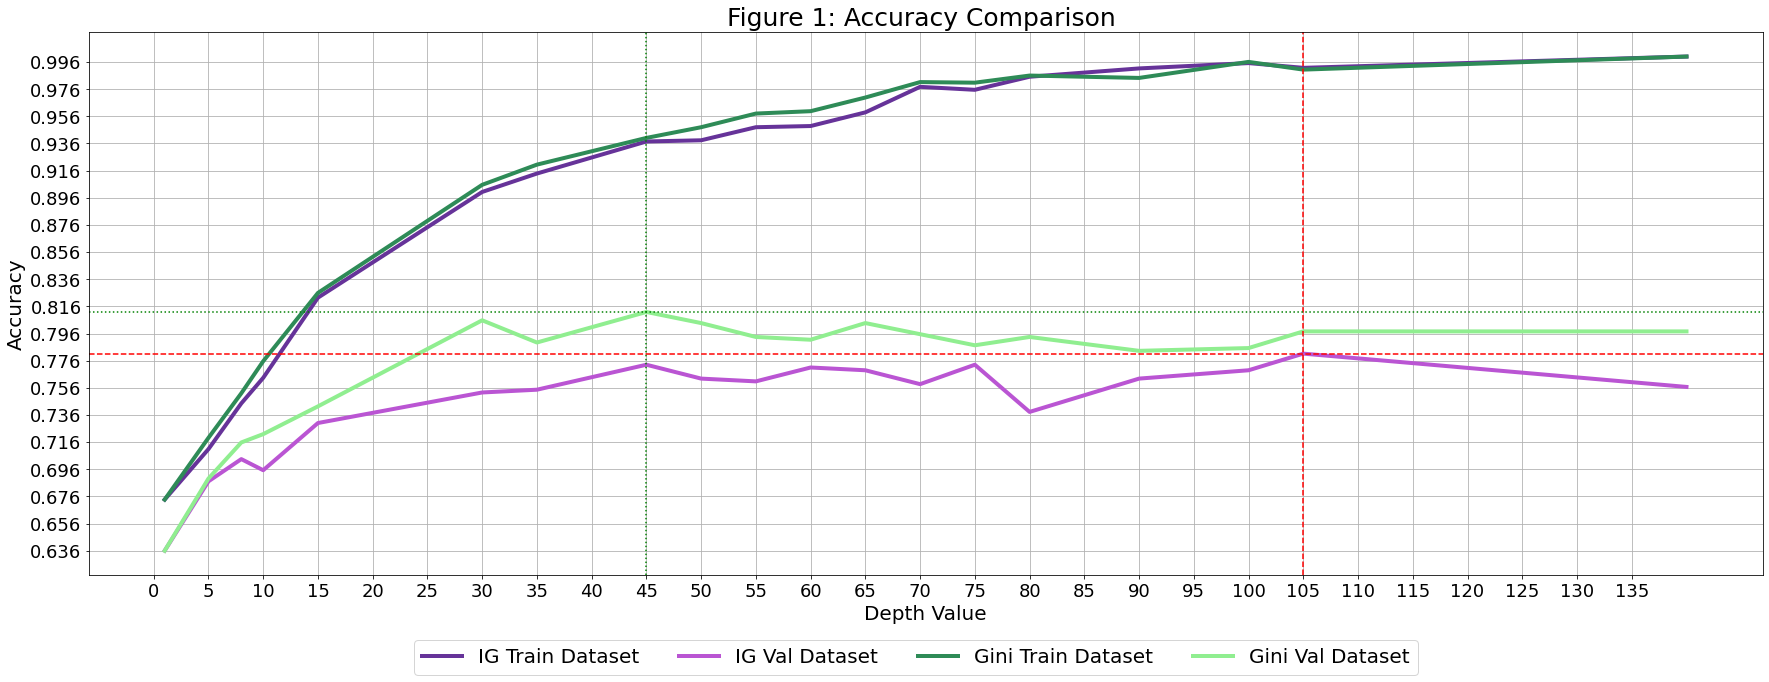

In [14]:
# Creating list of accuracy values for the calculations done above for entropy
entropy_val = []
entropy_train = []
depth_val = []
for d in res_entropy:
    entropy_val.append(res_entropy[d]['val'])
    entropy_train.append(res_entropy[d]['train'])
    depth_val.append(d)
    
# Creating list of accuracy values for the calculations done above for Gini
gini_val = []
gini_train = []
for d in res_gini:
    gini_val.append(res_gini[d]['val'])
    gini_train.append(res_gini[d]['train'])

# Calculating the absolute minimum and maximum of the accuracies
minimum_acc = min(min(gini_train), min(gini_val), min(entropy_train), min(entropy_val))
maximum_acc = max(max(gini_train), max(gini_val), max(entropy_train), max(entropy_val))

# Calculating the corresponding x-coordinate for both the Entropy and Gini maximum validation set accuracy:
entropy_max_x = depth_val[np.argmax(entropy_val)]
gini_max_x = depth_val[np.argmax(gini_val)]

# Line graph comparing Entropy and Gini criterion, with varying depths
plt.figure(figsize=(30, 10))
plt.plot(depth_val, entropy_train, label = "IG Train Dataset", color="rebeccapurple", linewidth=4)
plt.plot(depth_val, entropy_val, label = "IG Val Dataset", color="mediumorchid", linewidth=4)
plt.plot(depth_val, gini_train, label = "Gini Train Dataset", color="seagreen", linewidth=4)
plt.plot(depth_val, gini_val, label = "Gini Val Dataset", color="lightgreen", linewidth=4)

plt.title('Figure 1: Accuracy Comparison ', fontsize=25)
plt.xlabel('Depth Value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend(bbox_to_anchor=(0.8, -0.1), ncol=4, fontsize=20)
plt.xticks(np.arange(0, max(depth_val), 5), fontsize=18)
plt.yticks(np.arange(minimum_acc, maximum_acc, 0.02), fontsize=18)

# Looking for x and y co-ordinate for the maximum accuracy for both models
plt.axhline(y = max(entropy_val), color='r', linestyle='dashed')
plt.axvline(x=entropy_max_x, color='r', linestyle='dashed')
plt.axhline(y = max(gini_val), color='g', linestyle='dotted')
plt.axvline(x=gini_max_x, color='g', linestyle='dotted')
plt.grid()

# plt.savefig('acc_graphc10.png', bbox_inches='tight', facecolor = 'white')
plt.show

As can be seen in the figure above, 
- green dotted line represents the max Gini accuracy
- red dotted line represents the max Entropy accuracy

In my opinion, the best hyperparameters are:
- max_depth = 35 (reaches Gini max accuracy at 78.5%, which is not much lower than the 79.3% that is reached at depth 70)
- criterion = 'entropy'

In [15]:
test_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 80)
test_model = test_model.fit(data['train'][0], data['train'][1])
get_acc(test_model, *data['test'])

0.7494908350305499

## 2.D

### Plot using plot_tree:

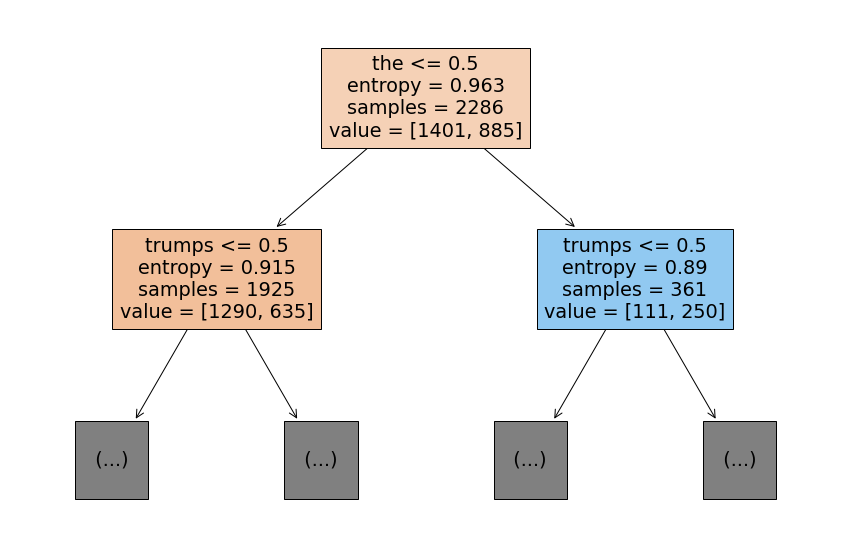

In [16]:
fig = plt.figure(figsize=(15,10))
clf = tree.DecisionTreeClassifier(max_depth=80, criterion = 'entropy')
clf = clf.fit(*data['train'])
# For top two layers:
_ = tree.plot_tree(clf, feature_names = vec.get_feature_names_out(), filled=True, max_depth=1)
# For top three layers:
# _ = tree.plot_tree(clf, feature_names = vec.get_feature_names_out(), filled=True, max_depth=2)

# fig.savefig('tree_top2layer_entropy.png', bbox_inches='tight', facecolor = 'white')

*Another way to visualize the tree!*   
text_representation = tree.export_text(clf)   
print(text_representation)

*Not part of the assignment but I was just really curious how the whole tree would look.*

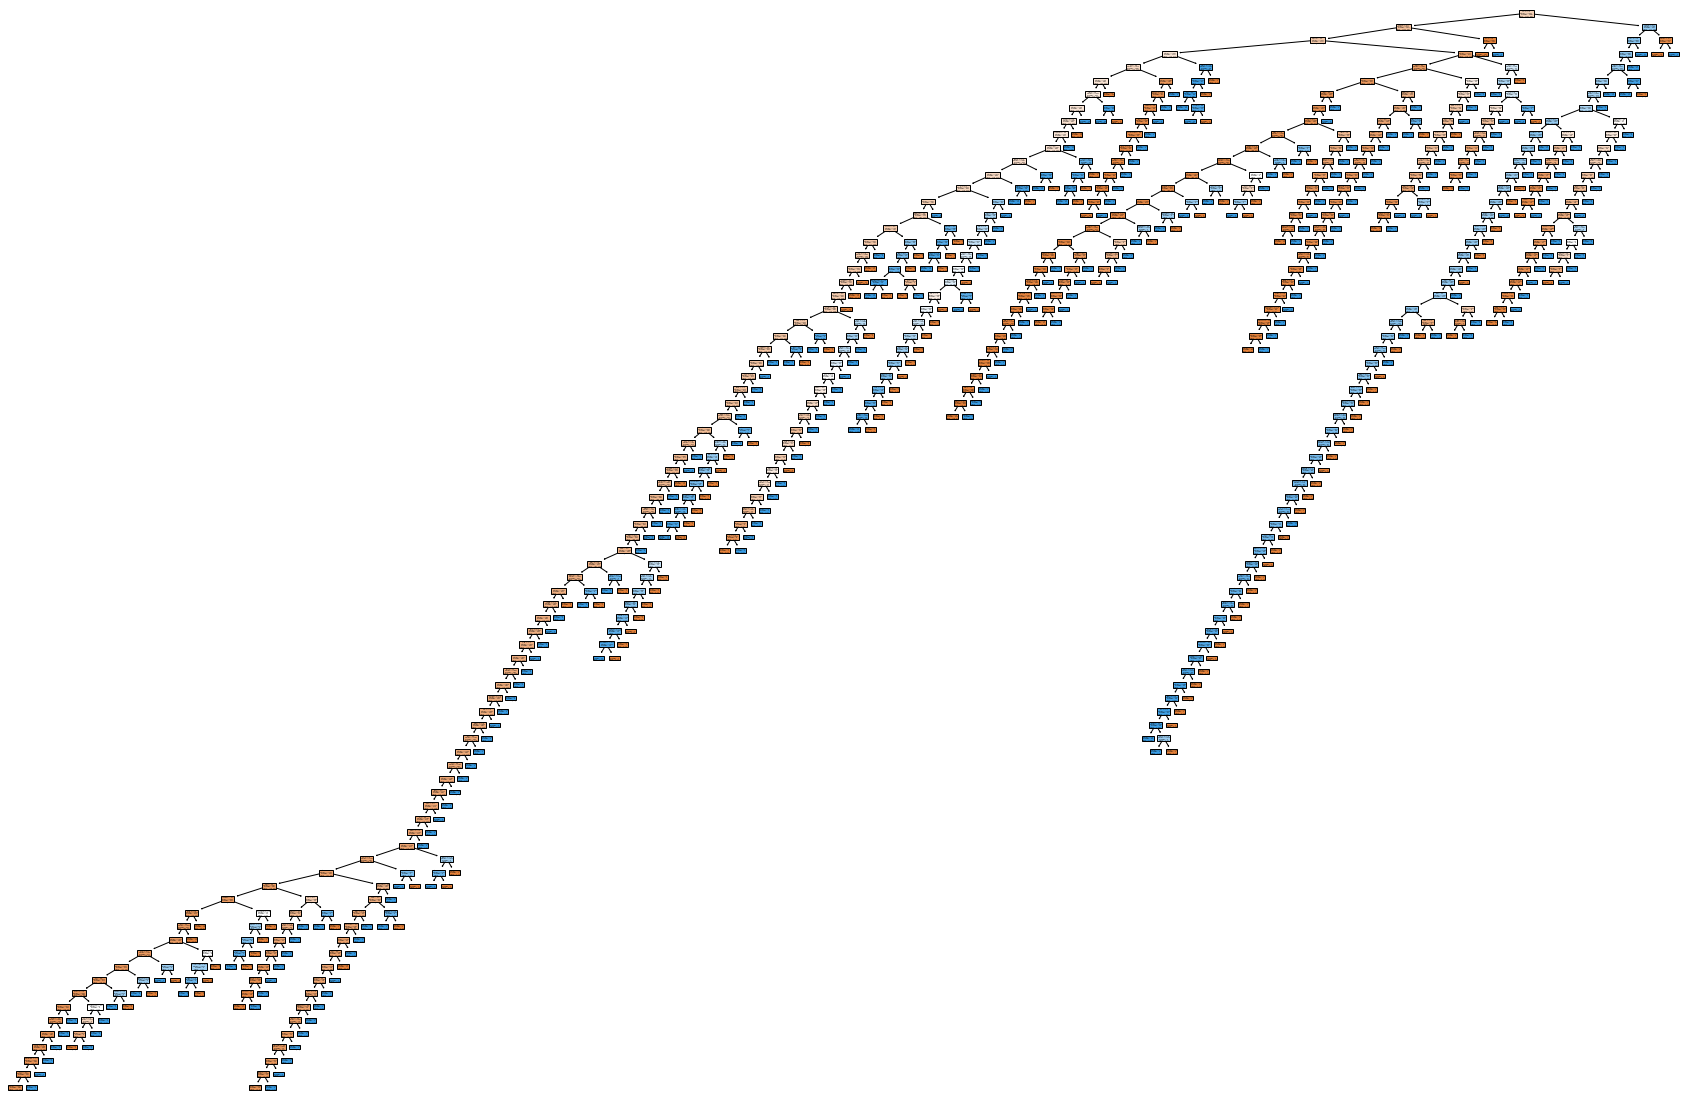

In [17]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(clf, feature_names = vec.get_feature_names_out(), filled=True)

### Plot using GraphViz:

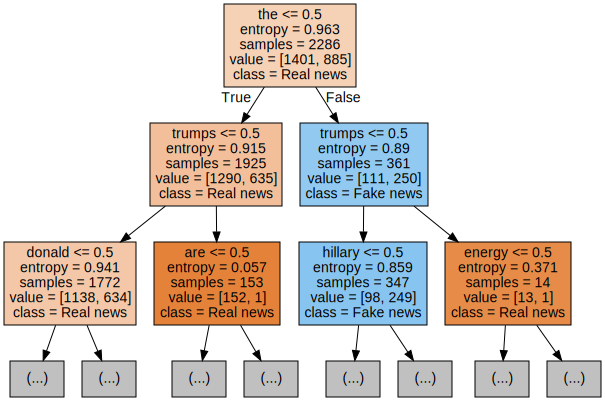

In [18]:
tree_viz = DecisionTreeClassifier(max_depth=80, criterion = 'entropy')
tree_viz = tree_viz.fit(*data['train'])

# I wanted an extra layer in this version, so I set max_depth to 2
dot_data_tree = tree.export_graphviz(tree_viz, out_file=None, max_depth=2, feature_names = vec.get_feature_names_out(), class_names=['Real news','Fake news'], filled=True)

graph = graphviz.Source(dot_data_tree, format="png") 
graph